In [1]:
import sys
import os

# Add the repo root to sys.path
repo_path = os.path.abspath(os.path.join(os.getcwd(), '../..'))  # adjust as needed
if repo_path not in sys.path:
    sys.path.insert(0, repo_path)

from src.votekit.ballot_generator import name_BradleyTerry 
from src.votekit.pref_interval import PreferenceInterval
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [ ]:
!pwd

In [43]:
def total_variation_distance(P, Q, labels):
    sum = 0 
    for x in labels:
        sum += abs(P[x] - Q[x])
    return (1/2)*sum

In [3]:
## setup the classes
#n_cands = 5
#cands = [chr(ord('a')+i) for i in range(n_cands)] # TODO: need a better way of generating cands which allow us to go larger than 26
#print("candidates: ", cands)

cands = ["W1", "W2", "C1", "C2"]
bt = name_BradleyTerry(
    candidates=cands,
        pref_intervals_by_bloc={
            "W": {
                "W": PreferenceInterval({"W1": 0.1, "W2": 0.1}),
                "C": PreferenceInterval({"C1": 0.4, "C2": 0.2}),
            },
            "C": {
                "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
                "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
            },
        },
        bloc_voter_prop={"W": 1, "C": 0},
        cohesion_parameters={"W": {"W": 0.5, "C": 0.5}, "C": {"C": 0.9, "W": 0.1}},
    )

'''
pref_intervals_by_bloc={
            "W": {
                "W": PreferenceInterval({"W1": 0.4, "W2": 0.3}),
                "C": PreferenceInterval({"C1": 0.2, "C2": 0.1}),
            },
            "C": {
                "W": PreferenceInterval({"W1": 0.2, "W2": 0.2}),
                "C": PreferenceInterval({"C1": 0.3, "C2": 0.3}),
            },
        },
        #bloc_voter_prop={"W": 0.7, "C": 0.3},
    '''
8

8

In [ ]:
burn_in_time = 10

In [4]:
# run BT both ways and then process the differences
num_ballots = int(10e4)
bals_BT_classic = bt.generate_profile(num_ballots)
bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False)

### Visualize the frequency differences between MCMC and classic BT method

False
{'W1C1C2W2': 0.04852, 'W1C1W2C2': 0.0723, 'W1W2C2C1': 0.02783, 'W1W2C1C2': 0.05402, 'W1C2W2C1': 0.01753, 'W1C2C1W2': 0.02435, 'C1W1C2W2': 0.06519, 'C1W1W2C2': 0.09729, 'C1W2C2W1': 0.0646, 'C1W2W1C2': 0.09766, 'C1C2W2W1': 0.04323, 'C1C2W1W2': 0.04194, 'W2C1C2W1': 0.04783, 'W2C1W1C2': 0.0729, 'W2W1C2C1': 0.0276, 'W2W1C1C2': 0.055, 'W2C2C1W1': 0.02455, 'W2C2W1C1': 0.01816, 'C2C1W2W1': 0.02126, 'C2C1W1W2': 0.02079, 'C2W1W2C1': 0.01267, 'C2W1C1W2': 0.01616, 'C2W2C1W1': 0.01621, 'C2W2W1C1': 0.01241}
['W1', 'W2', 'C1', 'C2']


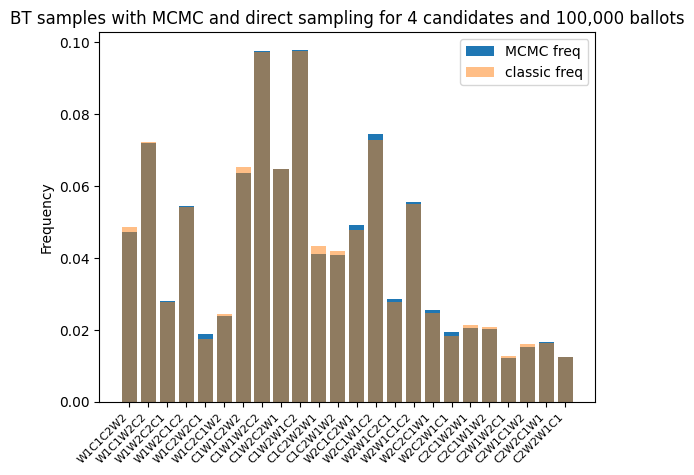

In [10]:
ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]


ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]

print(bal_labels_classic == bal_labels_MCMC) # labels not in the same order, so set up a map 

bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i]/num_ballots for i in range(len(ballot_rankings_classic))}
bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/num_ballots for i in range(len(ballot_rankings_MCMC))}

print(bal_rankings_map_classic)
x_labels = list(bal_rankings_map_classic.keys())


plt.bar(x_labels, [bal_rankings_map_MCMC[k] for k in x_labels], label="MCMC freq")
#plt.bar(list(bal_rankings_map_MCMC.keys()), [bal_rankings_map_MCMC[k] for k in list(bal_rankings_map_MCMC.keys())], label="MCMC freq")
plt.bar(x_labels, [bal_rankings_map_classic[k] for k in x_labels], label="classic freq", alpha=0.5)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.legend()
plt.ylabel("Frequency")
plt.title(f"BT samples with MCMC and direct sampling for {len(cands)} candidates and {num_ballots:,} ballots")

8
print(cands)


In [39]:
num_ballots_array = np.linspace(100, 2500, 25)
num_ballots_array = num_ballots_array.astype(int)[1:]


In [40]:
num_ballots_array

array([ 200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
       1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300,
       2400, 2500])

In [33]:
num_ballots = 10
blah = num_ballots

In [34]:
bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False)
bals_BT_classic = bt.generate_profile(num_ballots)

In [35]:
ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]


ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]

print(bal_labels_classic == bal_labels_MCMC) # labels not in the same order, so set up a map 

bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i]/num_ballots for i in range(len(ballot_rankings_classic))}
bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/num_ballots for i in range(len(ballot_rankings_MCMC))}

print(bal_rankings_map_classic)
x_labels = list(bal_rankings_map_classic.keys())

False
{'W2W1C2C1': 0.1, 'W2W1C1C2': 0.1, 'W2C1W1C2': 0.2, 'W2C2W1C1': 0.1, 'W1C1W2C2': 0.2, 'W1W2C1C2': 0.1, 'C1C2W1W2': 0.1, 'C2W2W1C1': 0.1}


In [36]:
bals_BT_classic.ballots[0]

Ranking
1.) W2, 
2.) W1, 
3.) C2, 
4.) C1, 
Weight: 1.0

In [38]:
x_labels

['W2W1C2C1',
 'W2W1C1C2',
 'W2C1W1C2',
 'W2C2W1C1',
 'W1C1W2C2',
 'W1W2C1C2',
 'C1C2W1W2',
 'C2W2W1C1']

In [22]:
bal_weights_MCMC

[3, 2, 3, 2]

In [15]:
bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i]/blah for i in range(len(ballot_rankings_classic))}
bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/blah for i in range(len(ballot_rankings_MCMC))}

In [18]:
bal_rankings_map_classic

{'W1C1C2W2': 485.2,
 'W1C1W2C2': 723.0,
 'W1W2C2C1': 278.3,
 'W1W2C1C2': 540.2,
 'W1C2W2C1': 175.3,
 'W1C2C1W2': 243.5,
 'C1W1C2W2': 651.9,
 'C1W1W2C2': 972.9,
 'C1W2C2W1': 646.0,
 'C1W2W1C2': 976.6,
 'C1C2W2W1': 432.3,
 'C1C2W1W2': 419.4,
 'W2C1C2W1': 478.3,
 'W2C1W1C2': 729.0,
 'W2W1C2C1': 276.0,
 'W2W1C1C2': 550.0,
 'W2C2C1W1': 245.5,
 'W2C2W1C1': 181.6,
 'C2C1W2W1': 212.6,
 'C2C1W1W2': 207.9,
 'C2W1W2C1': 126.7,
 'C2W1C1W2': 161.6,
 'C2W2C1W1': 162.1,
 'C2W2W1C1': 124.1}

  0%|                                                    | 0/24 [00:00<?, ?it/s]

0.28500000000000003


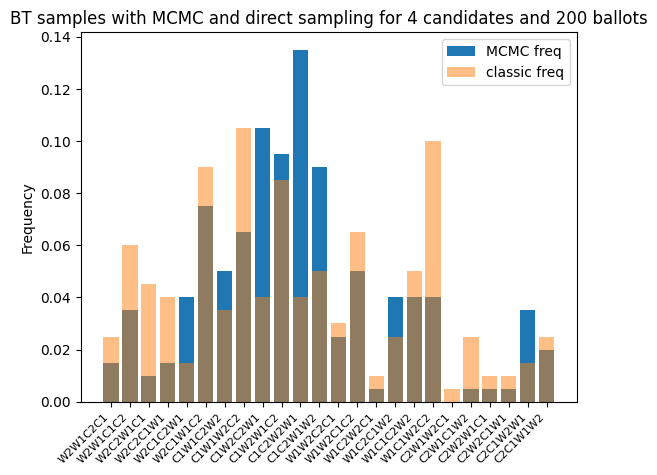

  4%|█▊                                          | 1/24 [00:00<00:03,  6.38it/s]

0.13


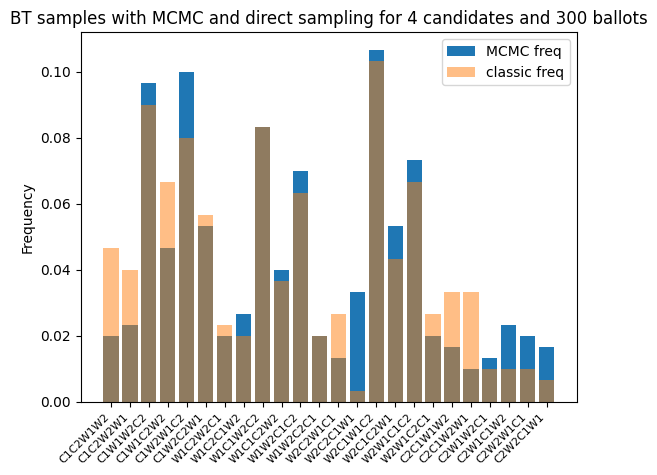

  8%|███▋                                        | 2/24 [00:00<00:03,  6.92it/s]

0.1275


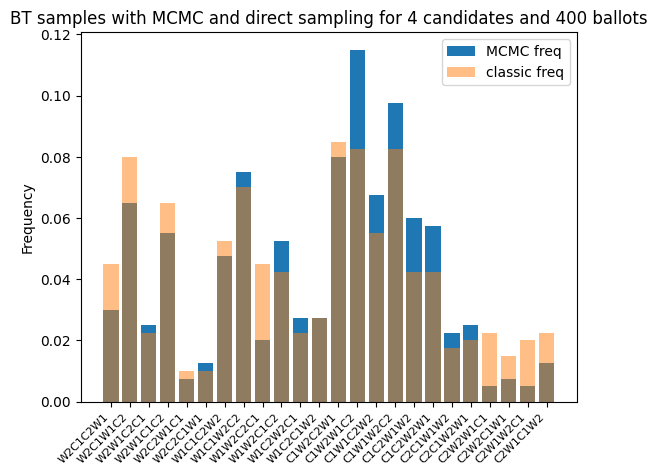

 12%|█████▌                                      | 3/24 [00:00<00:02,  7.47it/s]

0.22400000000000003


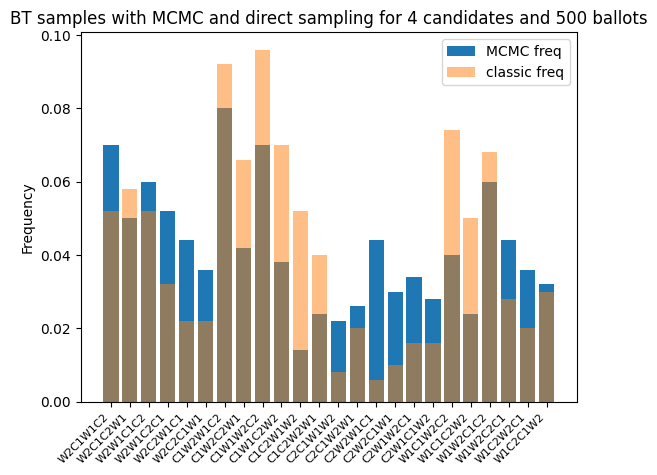

 17%|███████▎                                    | 4/24 [00:00<00:02,  7.83it/s]

0.15333333333333332


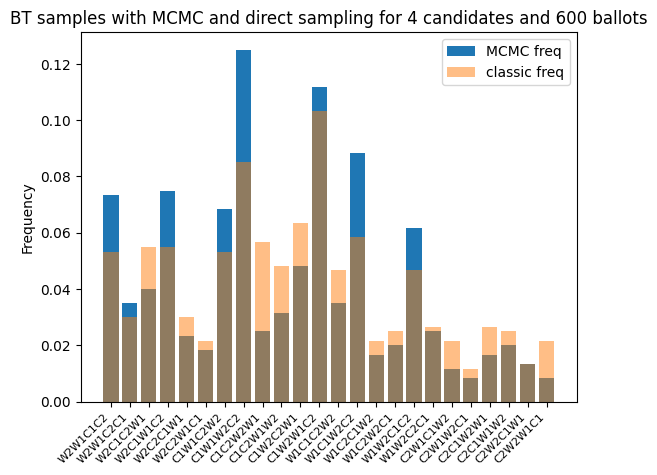

 21%|█████████▏                                  | 5/24 [00:00<00:02,  7.74it/s]

0.1285714285714286


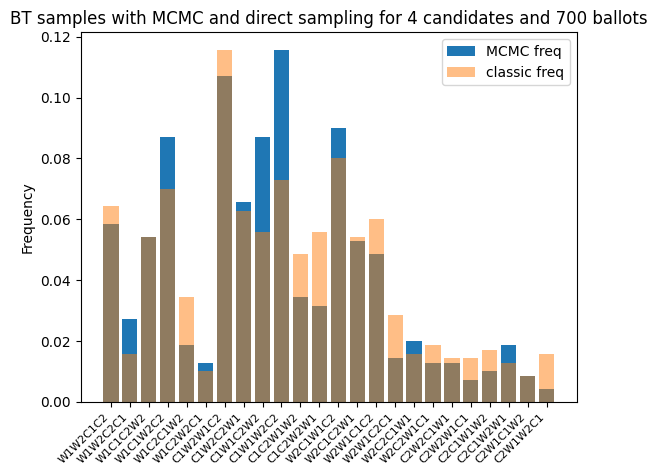

 25%|███████████                                 | 6/24 [00:00<00:02,  7.67it/s]

0.12000000000000004


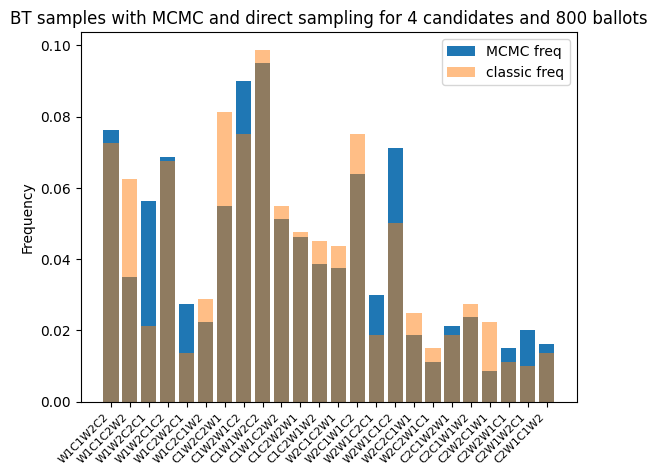

 29%|████████████▊                               | 7/24 [00:00<00:02,  7.85it/s]

0.09333333333333332


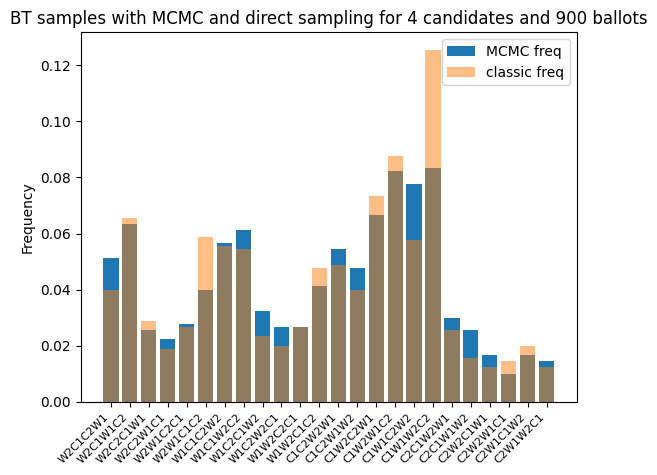

 33%|██████████████▋                             | 8/24 [00:01<00:01,  8.02it/s]

0.10200000000000001


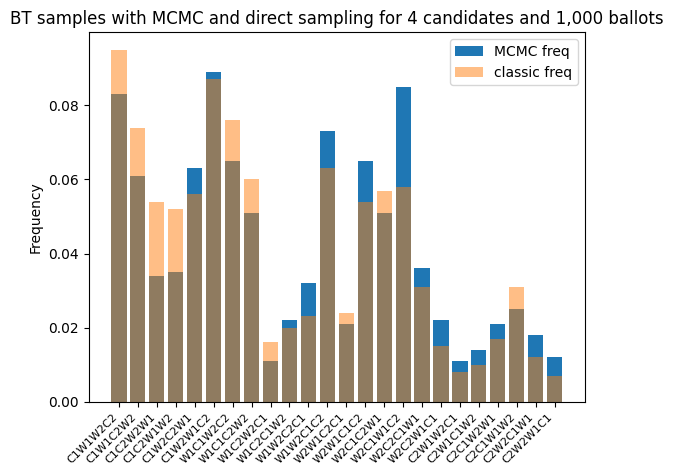

 38%|████████████████▌                           | 9/24 [00:01<00:01,  8.20it/s]

0.1409090909090909


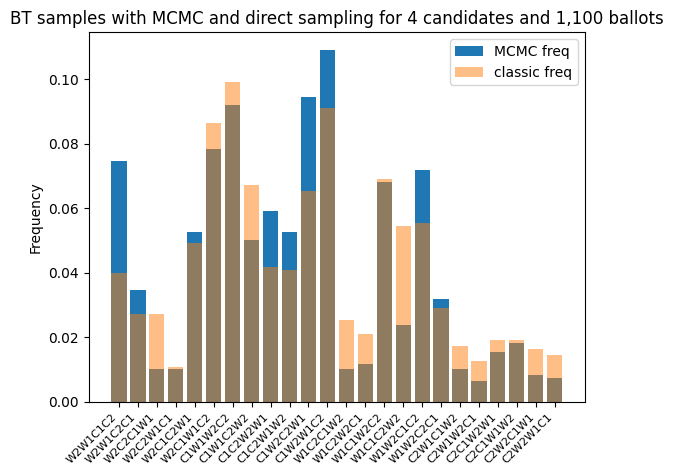

 42%|█████████████████▉                         | 10/24 [00:01<00:01,  8.31it/s]

0.11833333333333335


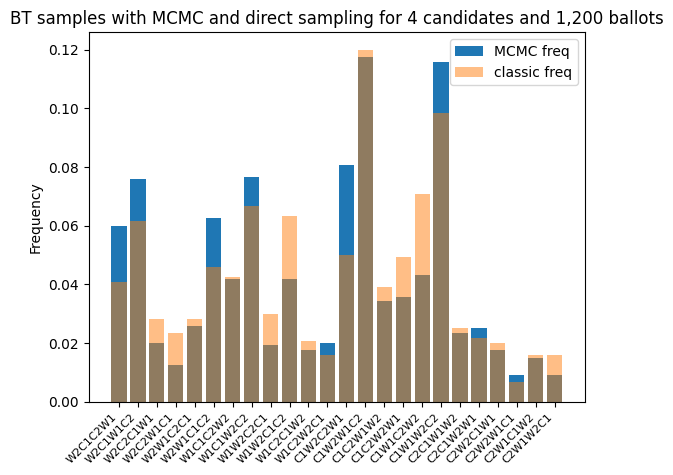

 46%|███████████████████▋                       | 11/24 [00:01<00:01,  7.96it/s]

0.1369230769230769


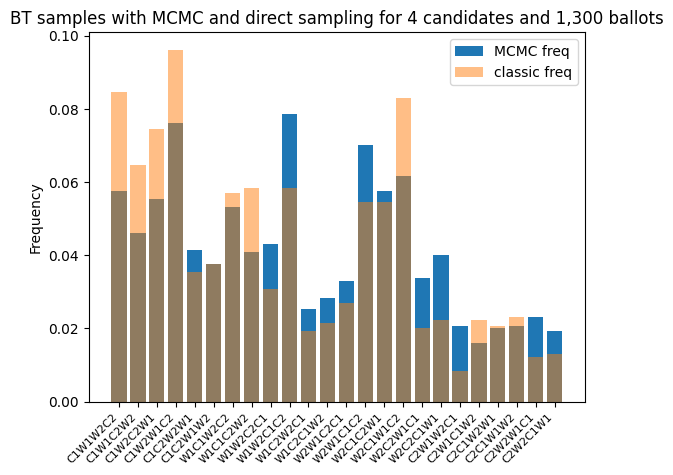

 50%|█████████████████████▌                     | 12/24 [00:01<00:02,  4.66it/s]

0.09428571428571429


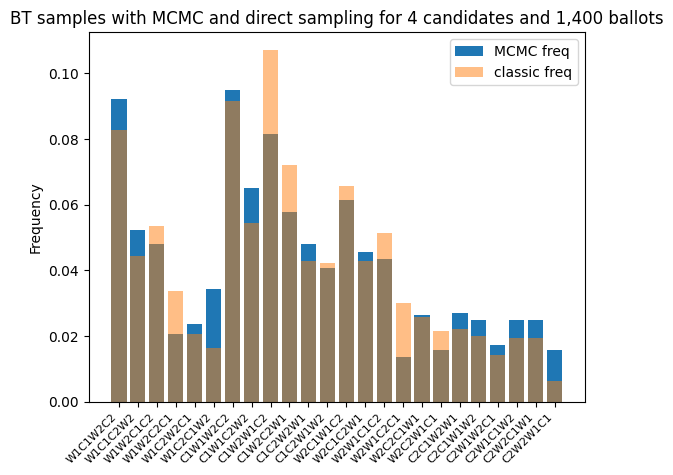

 54%|███████████████████████▎                   | 13/24 [00:01<00:02,  5.33it/s]

0.08866666666666667


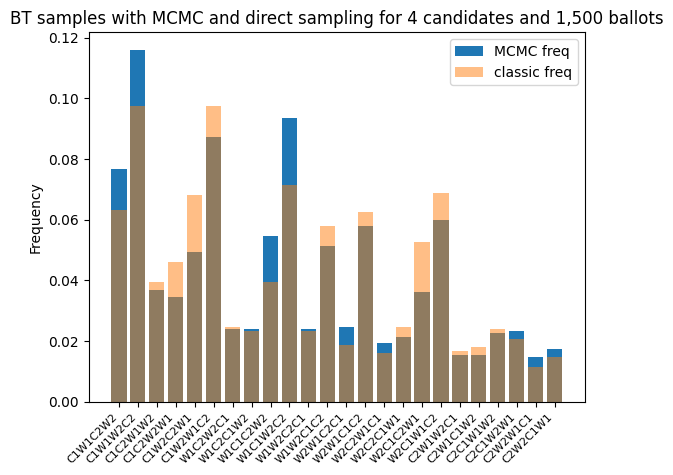

 58%|█████████████████████████                  | 14/24 [00:02<00:01,  5.88it/s]

0.057499999999999996


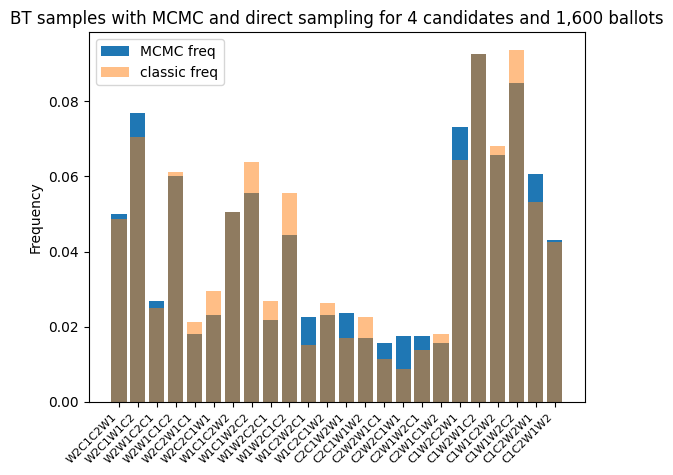

 62%|██████████████████████████▉                | 15/24 [00:02<00:01,  6.35it/s]

0.08


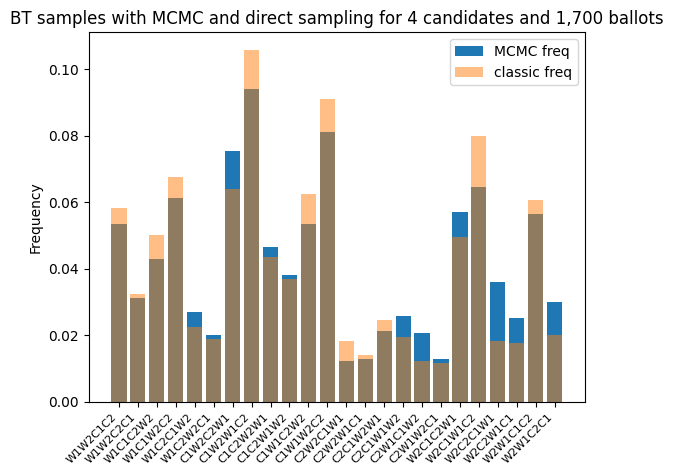

 67%|████████████████████████████▋              | 16/24 [00:02<00:01,  6.75it/s]

0.1072222222222222


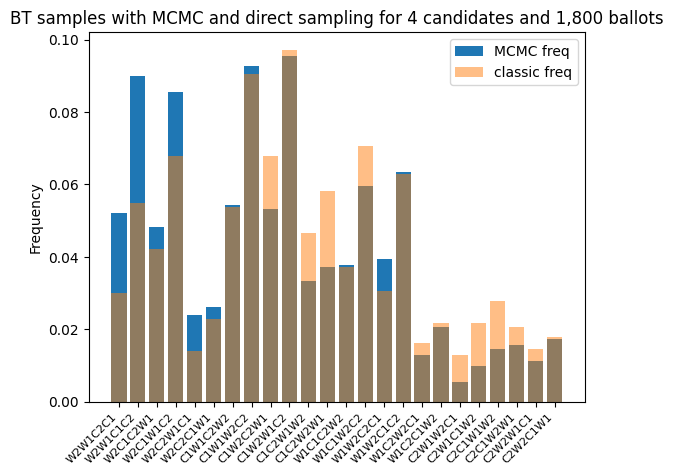

 71%|██████████████████████████████▍            | 17/24 [00:02<00:01,  6.95it/s]

0.08578947368421055


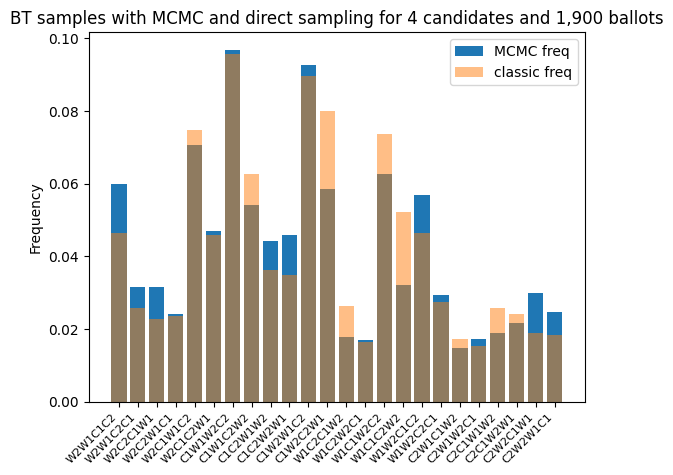

 75%|████████████████████████████████▎          | 18/24 [00:02<00:00,  6.87it/s]

0.10850000000000004


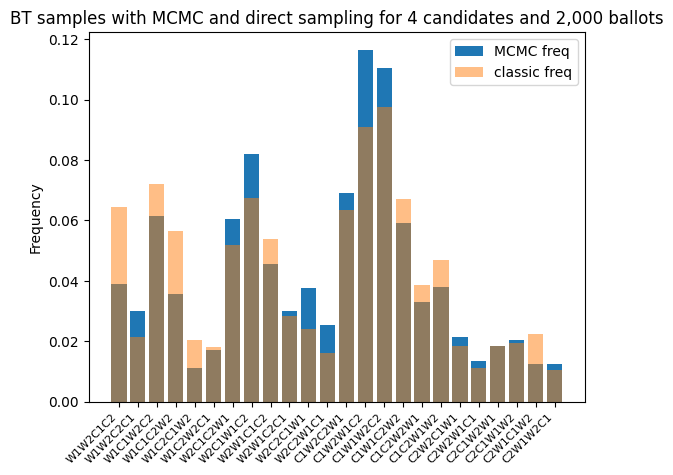

 79%|██████████████████████████████████         | 19/24 [00:02<00:00,  5.48it/s]

0.06523809523809523


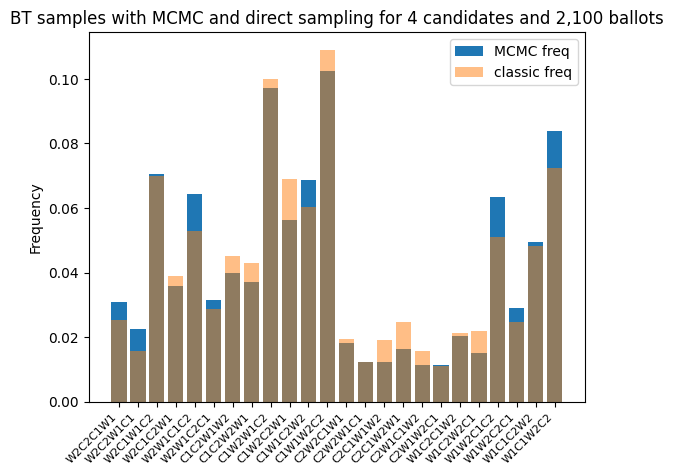

 83%|███████████████████████████████████▊       | 20/24 [00:03<00:00,  5.94it/s]

0.06909090909090908


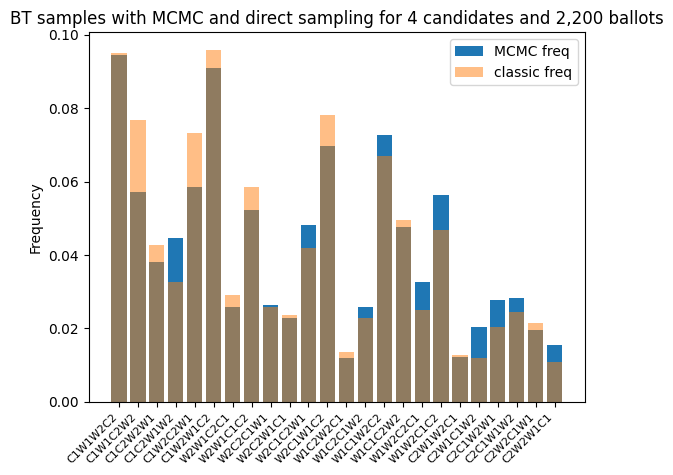

 88%|█████████████████████████████████████▋     | 21/24 [00:03<00:00,  6.14it/s]

0.11521739130434784


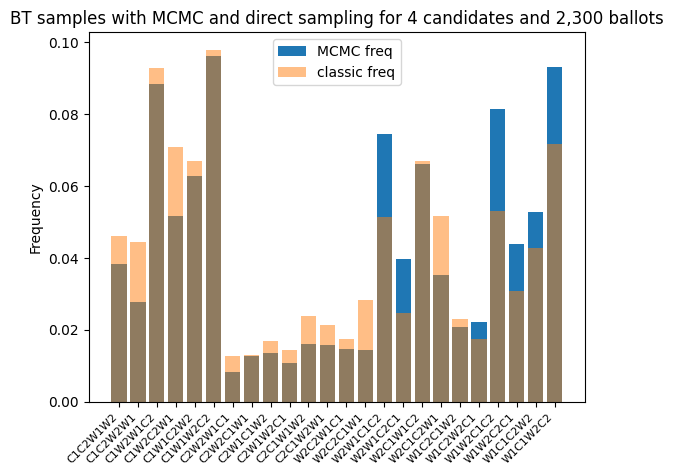

 92%|███████████████████████████████████████▍   | 22/24 [00:03<00:00,  6.27it/s]

0.06375


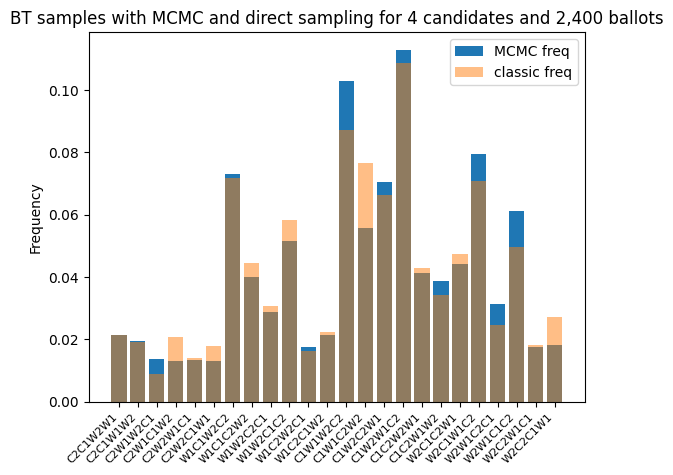

 96%|█████████████████████████████████████████▏ | 23/24 [00:03<00:00,  6.39it/s]

0.04759999999999998


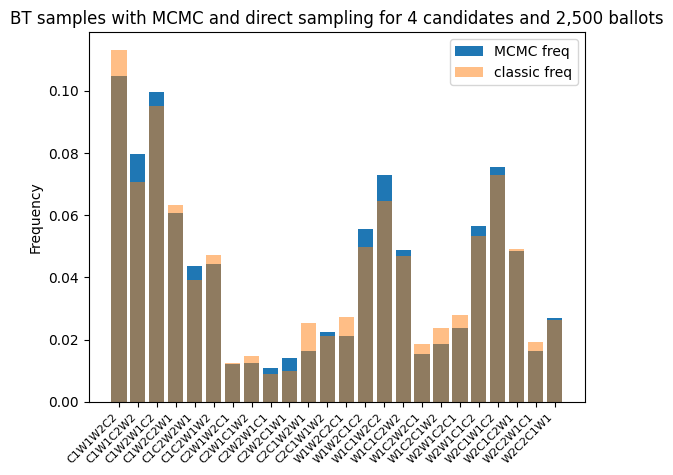

100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  6.63it/s]


In [47]:
tv_distances = []
for num_ballots in tqdm(num_ballots_array):

    ## -- Intialize the ballots ------------ 
    bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False)
    bals_BT_classic = bt.generate_profile(num_ballots)
    
    ## -- Calculate the pdf ----------------
    ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
    bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
    bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]
    
    
    ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
    bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
    bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]
    
    
    bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i]/num_ballots for i in range(len(ballot_rankings_classic))}
    bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/num_ballots for i in range(len(ballot_rankings_MCMC))}

    # populate any missing keys
    for key in bal_rankings_map_classic:
        if key not in bal_rankings_map_MCMC:
            bal_rankings_map_MCMC[key] = 0
    for key in bal_rankings_map_MCMC:
        if key not in bal_rankings_map_classic:
            bal_rankings_map_classic[key] = 0

    x_labels = list(bal_rankings_map_classic.keys())

    print(total_variation_distance(bal_rankings_map_MCMC, bal_rankings_map_classic, x_labels))

    plt.bar(x_labels, [bal_rankings_map_MCMC[k] for k in x_labels], label="MCMC freq")
    #plt.bar(list(bal_rankings_map_MCMC.keys()), [bal_rankings_map_MCMC[k] for k in list(bal_rankings_map_MCMC.keys())], label="MCMC freq")
    plt.bar(x_labels, [bal_rankings_map_classic[k] for k in x_labels], label="classic freq", alpha=0.5)
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.legend()
    plt.ylabel("Frequency")
    plt.title(f"BT samples with MCMC and direct sampling for {len(cands)} candidates and {num_ballots:,} ballots")
    plt.show()
    
    ## -- Calculate TV and store ----------- 
    tv_distances.append(total_variation_distance(bal_rankings_map_MCMC, bal_rankings_map_classic, x_labels))

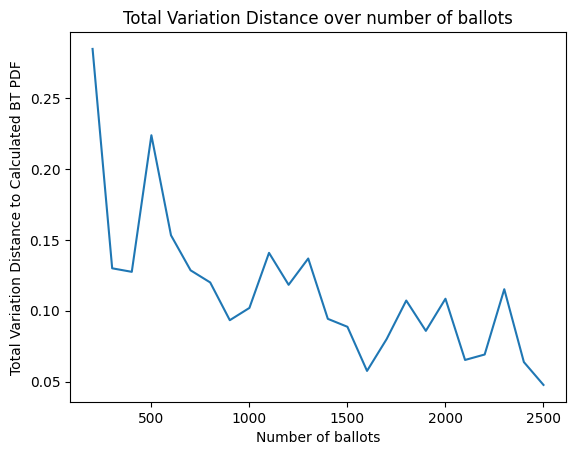

In [48]:
plt.plot(num_ballots_array, tv_distances)
plt.xlabel("Number of ballots")
plt.ylabel("Total Variation Distance to Calculated BT PDF")
plt.title("Total Variation Distance over number of ballots")
plt.show()

In [ ]:
total_variation_distance(bal_rankings_map_MCMC, bal_rankings_map_classic, x_labels)

In [ ]:
abs(bal_rankings_map_MCMC['W1W2C1C2'] - bal_rankings_map_classic['W1W2C1C2'])

In [ ]:
plt.bar(x_labels, [bal_rankings_map_classic[k] for k in x_labels], label="classic freq", alpha=0.8)
plt.xticks(rotation=45, ha='right', fontsize=8)
8


In [ ]:
bals_BT_MCMC.ballots